
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.


b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [243]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for visualization/ plotting
from matplotlib import pyplot as plt # used for visualization/ plotting
import pingouin as pg # used for calculating the correlation coefficient
import scipy.stats as stats #we will need this to be able to perform the Shapiro-Wilk test
import numpy as np # This is used for creating a contingency matrix
from scipy.stats import chi2_contingency #used for doing a chi-squared test

df_mh = pd.read_csv('MillerHadenData.csv')

In [244]:
# Q1a (code):
# Display first few rows of the dataframe
df_mh.head(4)

,Participant,Abil,IQ,Home,TV
0,1,61,107,144,487
1,2,56,109,123,608
2,3,45,81,108,640
3,4,66,100,155,493


In [245]:
# Check data types and information
df_mh.describe()

,Participant,Abil,IQ,Home,TV
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,13.000000,55.120000,100.040000,124.000000,599.920000
std,7.359801,6.084954,9.043782,21.039645,95.056965
min,1.000000,45.000000,81.000000,87.000000,407.000000
25%,7.000000,50.000000,95.000000,108.000000,523.000000
50%,13.000000,54.000000,100.000000,123.000000,636.000000
75%,19.000000,61.000000,104.000000,141.000000,673.000000
max,25.000000,67.000000,118.000000,161.000000,787.000000


In [246]:
# Reading ability and IQ both are ordered, continuous and have no true zero, meaning there is no such thing as 'no IQ' or 'no reading ability'. Therefore the data is interval.
# Participants, Home and TV are are all ratio data.

In [247]:
# Q1b (code):
# Check for missing values
#In this line I checked if there are any (.any()) values (.values) that are missing values, meaning they would be null (isnull())
df_mh.isnull().values.any()
# Since the answer is 'False', there are no missing values
# I used the following link for the documentation Link it: https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/ 

False

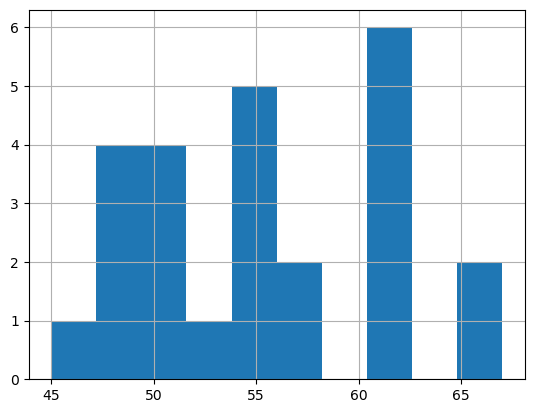

In [248]:
# Q1c (code): Lab 3 use Shapiro-wilk test
# In order to check if the data is normally distributed, I used the Shapiro-Wilk test.
# First I checked if reading ability 'Abil' is normally distributed. I made a histogram to make an educated guess. 
df_mh['Abil'].hist();
# It is not very convincingly normally distributed but it still could be.

In [249]:
# I used the Shapiro-Wilk test to get a robuster statement.
score_shapiro_abil, p_val_shapiro_abil = stats.shapiro(df_mh['Abil'])
print(score_shapiro_abil, p_val_shapiro_abil)
# If it's below the chosen alpha level (0.05) and the p-value is below 0.05, the null hypothesis (the data is normally distributed) will be rejected. 
# Since the p-value is above 0.05, we cannot reject the H0 hypothesis and therefore 'Ability' is normally distributed

0.9487951397895813 0.2354906052350998


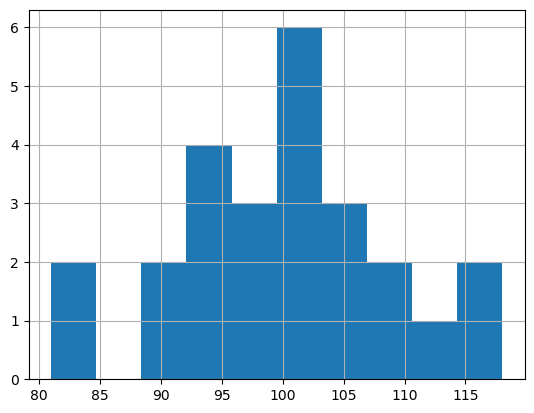

In [250]:
# Then we check if IQ is normally distributed
df_mh['IQ'].hist();
# It looks normally distributed but again, to make our claim more robust let's use the Shapiro-Wilk test

In [251]:
score_shapiro_iq, p_val_shapiro_iq = stats.shapiro(df_mh['IQ'])
print(score_shapiro_iq, p_val_shapiro_iq)
# Again, if the p-value is below the chosen alpha level (0.05), the null hypothesis (data is normally distributed) is rejected. 
# Since the p-value is above 0.05, we cannot reject the H0 hypothesis and therefore 'Ability' is normally distributed

0.9636039137840271 0.49081143736839294


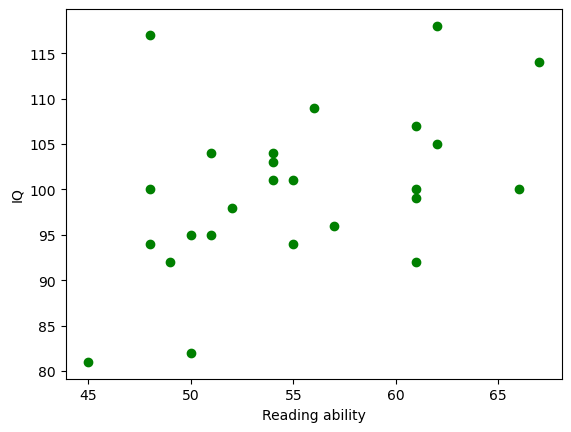

In [252]:
# Q1d (code):
# In order to create a scatter plot with Reading Ability on the x-axis and IQ, on the y-axis, I first used pyplot to visualize a scatter plot.
# I set the colour to green with c='g'
plt.scatter(x = df_mh['Abil'], y = df_mh['IQ'], c='g')
#Then I added titles to the axes to improve legibility.
x_axis = plt.xlabel('Reading ability') 
y_axis = plt.ylabel('IQ')
plt.show()

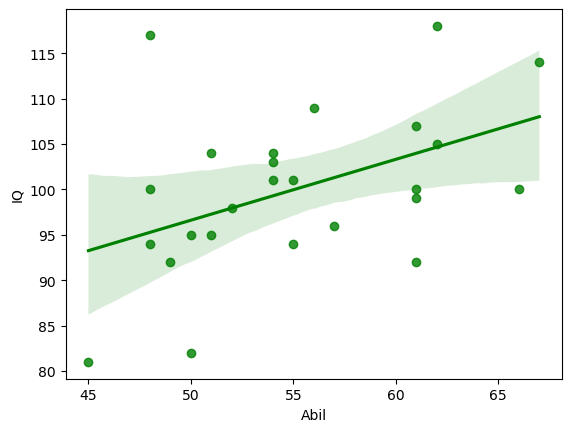

In [253]:
# Q1e (code):
# Finally, I added a correlation line to the scatter plot.
corr_line = sns.regplot(x="Abil", y="IQ", color="g", data=df_mh)
plt.show() 

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explain why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [254]:
# Q2a (answer with words):
# Given that the data I research is normally distributed and on a scale, I aim to use the appropriate test for the data; a parametric test. 
# Therefore we want to use the Pearson test because it is parametric.
# The Spearman test is a non-parametric test 

In [255]:
# Q2b (code):
# In order to conduct a coefficient test with the Pearson test between the variables reading ability 'Abil' and IQ 'IQ', I used the following code:
corr_abil_iq = pg.corr(df_mh['Abil'], df_mh['IQ'])
print(corr_abil_iq)

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


In [256]:
# Q2c (answer with words):
# n is the sample size, this dataset contains 25 samples
# r is the correlation coefficient. The correlation coefficient says something about the relationship between 2 variables.
# r=0.45117 suggests a weak, yet positive correlation between the variables reading ability 'Abil' and IQ 'IQ'. 
# CI95% refers to the Confidence interval of 95%. The true correlation coefficient between the two variables is estimated to fall within the parameters of 0,07 and 0,72 with 95% confidence
# p-val is the p-value, which is the probability of obtaining results at least as extreme as the observed results of our statistical hypothesis test,
# assuming that the null hypothesis is correct. The p-value of 0.02 is below the alpha-level 0.05 and therefore we can reject the hypothesis that the variables are not correlated.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group has a low reading ability (Reading Ability at or below the rounded average), and the second group has a high reading ability (Reading Ability above the rounded average). We will store these groups in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Home above the rounded average). We will store these groups in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-squared test.

e. Interpret the results of the Chi-squared test (answer in text).

In [257]:
# Q3a (answer in words):
# H0: When the time spent reading at home 'Home' changes, we observe no significant change in the reading ability 'Abil'
# H1：When the time spent reading at home 'Home' changes, we observe a significant change of reading ability 'Abil'

In [258]:
# Q3b (code):
# Define the rounded average for Reading Ability and Home
# The average is also known as the mean. To find out the average I used .mean() and to round the average I used .round()
print(f'the average for reading ability (Abil) is {df_mh["Abil"].mean().round()}')
print(f'the average for time spent reading at home (Home) is {df_mh["Home"].mean().round()}')

the average for reading ability (Abil) is 55.0
the average for time spent reading at home (Home) is 124.0


In [259]:
# Create the Rank_Abil column
# First I made a list where I turned the numerical values into two categories: low and high reading ability, depending on if they are below or above the rounded average (55).
# Any participant with a reading ability that is the exact same as the average will be in the same category as below average as per instructions.
lst_Rank_Abil=[]
for value in df_mh['Abil']:
    if value > 55:
        lst_Rank_Abil.append('high')
    else:
        lst_Rank_Abil.append('low')
# Then I turned it into a dataframe
rank_abil_df = pd.DataFrame(lst_Rank_Abil)
# Then I used .insert() to insert the Rank_Abil dataframe into the df_mh dataframe. 
# The index is 0, the column name is Rank_Abil and the third argument is the dataframe we want to insert
df_mh.insert(0, 'Rank_Abil', rank_abil_df)

In [260]:
# Create the Rank_Home column
# Similarly to last exercise, I transformed the numerical values into frequent and infrequent depending on if they are below or above the rounded average (124).
# Again, I made a list and appended the categories
lst_Rank_Home=[]
for value in df_mh['Home']:
    if value > 124:
        lst_Rank_Home.append('frequent')
    else:
        lst_Rank_Home.append('infrequent') 
rank_home_df = pd.DataFrame(lst_Rank_Home)
# I used .insert() to insert the Rank_Home dataframe into the df_mh dataframe. 
# The index is 0, the column name is Rank_Home and the third argument is the dataframe I inserted into the dataframe df_mh
df_mh.insert(0, 'Rank_Home', rank_home_df)

In [261]:
df_mh.head(3)
# The result is visible below and forms the base for a contingency matrix

,Rank_Home,Rank_Abil,Participant,Abil,IQ,Home,TV
0,frequent,high,1,61,107,144,487
1,infrequent,high,2,56,109,123,608
2,infrequent,low,3,45,81,108,640


In [262]:
# There are four possible combinations
# 1. Someone is an infrequent reader with a low reading ability
# 2. Someone is an infrequent reader with a high reading ability
# 3. Someone is a frequent reader with a low reading ability
# 4. Someone is a frequent reader with a high reading ability

# I initiated variable to store the amount of occurences in
infreq_low=0
infreq_high=0
freq_low=0
freq_high=0

# I looped over each row
for index, row in df_mh.iterrows():
    # Here I counted how many combinations there were for an infrequent reader with a low reading ability
    if (row['Rank_Home'] == 'infrequent') and (row['Rank_Abil'] == 'low'):
        infreq_low += 1
    # Here I counted how many combinations there were for an infrequent reader with a high reading ability
    elif (row['Rank_Home'] == 'infrequent') and (row['Rank_Abil'] == 'high'):
        infreq_high+=1
    # Here I counted how many combinations there were for a frequent reader with a low reading ability
    elif (row['Rank_Home'] == 'frequent') and (row['Rank_Abil'] == 'low'):
        freq_low+=1
    # And finally I counted how many combinations there were for a frequent reader with high reading ability
    elif (row['Rank_Home'] == 'frequent') and (row['Rank_Abil'] == 'high'):
        freq_high+=1

In [263]:
# Q3c (code):
# Construct Contingency Matrix

# In order to construct a contingency matrix, I first made a list with the amount of occurences for each possible combination.
contingency_lst=[]
# After which I added the outcomes of each combination
contingency_lst.append(infreq_low) 
contingency_lst.append(infreq_high)
contingency_lst.append(freq_low)
contingency_lst.append(freq_high)

# I then transformed the list into a contingency matrix
data_cm = np.array(contingency_lst).reshape(2,-1)

print('The contingency matrix')
print(data_cm)

The contingency matrix
[[12  2]
 [ 3  8]]


In [264]:
# Q3d (code):
# Perform the Chi-squared test
chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(data_cm)
print(chi2, p_value)
print('These are the expected frequencies')
print(expected_frequencies)

if p_value < 0.05:
    print("The observed differences are statiscally significant - H0 is rejected")
else:
    print("The observed differences are not statiscally significant - H1 is rejected")

6.500270562770561 0.010785807794066234
These are the expected frequencies
[[8.4 5.6]
 [6.6 4.4]]
The observed differences are statiscally significant - H0 is rejected


In [265]:
# Q3e (answer in words):
# I used the chi-squared test to see whether the difference in frequency distributions is statistically significant. The chosen alpha-level is 0.05 and the p-value is 0.01
# so there is not a very large possibility of the same results if the null hypothesis were true. This means we can reject the null hypothesis.
# Therefore one can infer that it is unlikely that there is no relation between time spent reading at home and reading ability.

## Task 3. Two-sample t-test
As we discussed in Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

### Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male? (I am going to assume it is supposed to say evaluators here, not participants)


In [266]:
# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [267]:
# In order to handle missing values, I deleted them.
no_null_df_evaluators = df_evaluators.dropna()
# I used the link below for the code
# https://saturncloud.io/blog/how-to-delete-rows-with-null-values-in-a-specific-column-in-pandas-dataframe/#:~:text=a%20Specific%20Column-,One%20common%20approach%20to%20handle%20null%20values%20is%20to%20delete,values%20in%20the%20specified%20column.

In [268]:
# Q4a (code):
# Calculate mean and standard deviation for age
no_null_df_evaluators['age'].describe()
# From the data below, it becomes clear that the mean is 30.852941 and the standard deviation is 6.238358

count    34.000000
mean     30.852941
std       6.238358
min      23.000000
25%      27.000000
50%      29.000000
75%      32.750000
max      48.000000
Name: age, dtype: float64

In [269]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
# First I counted how many instances of sex being equal to 1 there are, which is 4 
# and then we count the amount of instances of sex being equal to 2, which is 30
print(f" There are {len(df_evaluators.loc[df_evaluators['sex']==1])} male evaluators")
print(f" There are {len(df_evaluators.loc[df_evaluators['sex']==2])} female evaluators")

 There are 4 male evaluators
 There are 30 female evaluators


### Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings of individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, already found in ratings.csv. In the end we will have a new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [270]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [271]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent'.
# I defined intellectual traits, which consists of the traits 'competent', 'intelligent' and 'thoughtful'.
intellect_traits = ['competent', 'intelligent', 'thoughtful']
#Then I initiated the variable intellect  and made sure to only keep the values that are equal to intellectual traits.
intellect = df_ratings[df_ratings['Category'].isin(intellect_traits)]
intellect.head(2)

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0


In [272]:
# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
# I grouped by eval_id and calculated the mean for the Rating column
mean_intellect_per_eval = intellect.groupby('eval_id')['Rating'].mean()
mean_intellect_per_eval.head(2)

eval_id
1    6.000000
2    5.666667
Name: Rating, dtype: float64

In [273]:
# I reset the index to convert it back into a dataframe.
mean_intellect_per_eval = mean_intellect_per_eval.reset_index()

In [274]:
# Add a 'Category' column with the value 'intellect' for these rows
mean_intellect_per_eval['Category'] = 'intellect'
mean_intellect_per_eval.head(2)

,eval_id,Rating,Category
0,1,6.000000,intellect
1,2,5.666667,intellect


In [275]:
# Create a DataFrame for 'impression' and 'hire' ratings
# I initiated other_ratings and created dataframes for the values impression and hire in the column Category
other_ratings = ['impression', 'hire']

In [276]:
# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
other_ratings_df = df_ratings[df_ratings['Category'].isin(other_ratings)]

In [277]:
# Now let's make ratings2: a combination of intellect ( intellect rating per evaluator 'mean_intellect_per_eval') and other_ratings_df
ratings2 = pd.concat([mean_intellect_per_eval, other_ratings_df])
ratings2.head(2)

,eval_id,Rating,Category
0,1,6.000000,intellect
1,2,5.666667,intellect


In [278]:
# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2.insert(1, 'Condition', df_evaluators['condition'])

In [279]:
# As visible below, the column Condition is succesfully added.
ratings2.head(2)

,eval_id,Condition,Rating,Category
0,1,listened,6.000000,intellect
1,2,listened,5.666667,intellect


In [280]:
# Select only the necessary columns as per the structure required
# On account of efficiency, I directly took the condition column from 'df_evaluators' and inserted it into 'ratings2' thus have no redundant columns

In [281]:
# Arrange by 'eval_id' and 'Category'
ratings2.sort_values(by = ['eval_id','Category']) 
# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Condition,Rating,Category
0,1,listened,6.000000,intellect
1,2,listened,5.666667,intellect
2,3,listened,6.000000,intellect
3,4,read,3.333333,intellect
4,5,read,1.000000,intellect


### Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explain why.

c. What are the independent variable and the dependent variable here?



In [282]:
# Q6a (answer in words):
# Null hypothesis: There is no significant difference between overall ratings on the Rating scale for intellect, hire and impression between evaluators who listened to resume pitches
# and evaluators who read the resume pitches (H0:μ1=μ2).

# Alternative hypothesis: There will be a significant difference between overall ratings on the Ratings scale for intellect, hire and impression between evaluators who listened to resume pitches 
# and evaluators who read the resume pitches (H1:μ1≠μ2).

In [283]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
# I am measuring the difference between a resume pitch either being listened to or being read, the data is unpaired or independent.
# Therefore, I am using the two-tailed t-test.

In [284]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
# The dependent variable always changes according to the independent variable
# I try to measure whether Rating varies according to the condition (whether the evaluator read or listened to the resume pitch)
# The independent variable is the condition and the dependent variable is the Rating, more specifically Rating for intellect, hire and impression.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explain why we use these tests and how we made our decisions based on these test results.

In [285]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for performing the shapiro-wilk, levene and independent t-test

# Descriptive analysis of the ratings
ratings2['Rating'].describe()

count    117.000000
mean       4.561254
std        2.240198
min        0.000000
25%        3.000000
50%        4.666667
75%        6.000000
max        9.000000
Name: Rating, dtype: float64

In [286]:
# Test for normal distribution (Shapiro-Wilk test)
# First, I made sub-divisions for the Category column containing the values 'intellect', 'hire' and 'impression'
sub_intellect = ratings2[ratings2['Category']== 'intellect']
sub_hire = ratings2[ratings2['Category']== 'hire']
sub_imp = ratings2[ratings2['Category']== 'impression']

In [287]:
# Test for normal distribution (Shapiro-Wilk test)
# Intellect
score_shapiro_int, p_val_shapiro_int = stats.shapiro(sub_intellect['Rating'])
print(f'The shapiro score and p-value for intellect are: {score_shapiro_int, p_val_shapiro_int}')
# Hire
score_shapiro_hir, p_val_shapiro_hir = stats.shapiro(sub_hire['Rating'])
print(f'The shapiro score and p-value for hire are: {score_shapiro_hir, p_val_shapiro_hir}')
# Impression
score_shapiro_imp, p_val_shapiro_imp = stats.shapiro(sub_imp['Rating'])
print(f'The shapiro score and p-value for impression are: {score_shapiro_imp, p_val_shapiro_imp}')
# The null hypothesis of normal distribution is rejected once the p-value is below 0.05
# Therefore, intellecy and impression ratings are normally distributed but hire is not.

The shapiro score and p-value for intellect are: (0.9747602939605713, 0.5182666182518005)
The shapiro score and p-value for hire are: (0.9427909851074219, 0.04710369557142258)
The shapiro score and p-value for impression are: (0.9595587849617004, 0.17238670587539673)


In [288]:
#I created a dataframe of all ratings of intellect who had been listened to 
listen_intel = sub_intellect[sub_intellect['Condition']=='listened']
read_intel = sub_intellect[sub_intellect['Condition']=='read']
# Then I did the same for hire
listen_hire = sub_hire[sub_hire['Condition']=='listened']
read_hire = sub_hire[sub_hire['Condition']=='read']
# Then I did the same for impression
listen_imp = sub_imp[sub_imp['Condition']=='listened']
read_imp = sub_imp[sub_imp['Condition']=='read']

In [289]:
# Test for homogeneity of variances (Levene's test)
# there's enough homogeneity if it's not significant
#I conducted the levene test for Ratings of intellect for both pitches that were listened to and read.
score, p_val = stats.levene(listen_intel['Rating'], read_intel['Rating'])
if p_val < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")

Levene's test is not significant - proceed


In [290]:
# Test for homogeneity of variances (Levene's test)
# there's enough homogeneity if it's not significant
#I conducted the levene test for Ratings of hire for both pitches that were listened to and read.
score, p_val = stats.levene(listen_hire['Rating'], read_hire['Rating'])
if p_val < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")

Levene's test is not significant - proceed


In [291]:
# Test for homogeneity of variances (Levene's test)
# there's enough homogeneity if it's not significant
#I conducted the levene test for Ratings of impression for both pitches that were listened to and read.
score, p_val = stats.levene(listen_imp['Rating'], read_imp['Rating'])
if p_val < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")

Levene's test is not significant - proceed


In [292]:
# Independent t-tests
# I conducted the two-tailed independent t-test for intellect
ttest_score, p_val = stats.ttest_ind(listen_intel['Rating'], read_intel['Rating']) 
if p_val < 0.05:
    print("Difference is statistically significant - reject H0, confirm H1")
else:
    print("Difference is NOT statistically significant - reject H1, confirm H0")
# According to H1, there is a statistically significant difference in the ratings between listened to and read pitches regarding intellect 
# Therefore there seems to be a relationship between the rating of intellect and whether the pitch is being listened to or read 

Difference is statistically significant - reject H0, confirm H1


In [293]:
# Independent t-tests
# I conducted the two-tailed independent t-test for hire
ttest_score, p_val = stats.ttest_ind(listen_hire['Rating'], read_hire['Rating']) 
if p_val < 0.05:
    print("Difference is statistically significant - reject H0, confirm H1")
else:
    print("Difference is NOT statistically significant - reject H1, confirm H0")
# In the case of hire there was not statistically significant difference between whether a pitch was read or listened to.

Difference is NOT statistically significant - reject H1, confirm H0


C:\Users\bente\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [294]:
# Independent t-tests
# I conducted the two-tailed independent t-test for hire
ttest_score, p_val = stats.ttest_ind(listen_imp['Rating'], read_imp['Rating']) 
if p_val < 0.05:
    print("Difference is statistically significant - reject H0, confirm H1")
else:
    print("Difference is NOT statistically significant - reject H1, confirm H0")
#Finally, in the case of impression it cannot be denied that there is no relation between being listened to or read in the case of a resume pitch.

Difference is statistically significant - reject H0, confirm H1


In [295]:
#Q7b (answer in words):

# With the Shapiro-Wilk test, I concluded that apart from hire, intellect and impression ratings are normally distributed.
# With Levene's test, I concluded that the homogeneity of variance was verified for the rating of intellect, hire and impression.
# Finally, with the independent t-tests, I concluded whether the statistical difference was significant enough to reject the null hypothesis or not. 
# As a caveat, it is important to mention that the data used in this notebook is playground data and thus, 
# rather than drawing conclusions about the real world, this notebook is mostly to deepen a basic understanding in inferential statistics.